In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")
from itertools import cycle
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('2019_04.csv')
df.head()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2019-04-01,4393,1.0,Long Branch,74,Long Branch,74,2019-04-02 00:08:00,2019-04-02 00:07:06,0.000000,departed,No Jersey Coast,NJ Transit
1,2019-04-01,4393,2.0,Long Branch,74,Elberon,40,2019-04-02 00:12:00,2019-04-02 00:13:09,1.150000,departed,No Jersey Coast,NJ Transit
2,2019-04-01,4393,3.0,Elberon,40,Allenhurst,4,2019-04-02 00:16:00,2019-04-02 00:18:07,2.116667,departed,No Jersey Coast,NJ Transit
3,2019-04-01,4393,4.0,Allenhurst,4,Asbury Park,8,2019-04-02 00:20:00,2019-04-02 00:21:12,1.200000,departed,No Jersey Coast,NJ Transit
4,2019-04-01,4393,5.0,Asbury Park,8,Bradley Beach,22,2019-04-02 00:23:00,2019-04-02 00:23:10,0.166667,departed,No Jersey Coast,NJ Transit


In [4]:
df.dtypes

date               object
train_id           object
stop_sequence     float64
from               object
from_id             int64
to                 object
to_id               int64
scheduled_time     object
actual_time        object
delay_minutes     float64
status             object
line               object
type               object
dtype: object

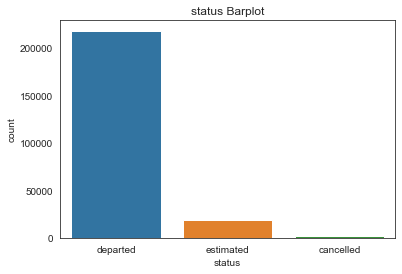

In [5]:
plt.title("status Barplot")
sns.countplot(x="status", data=df)

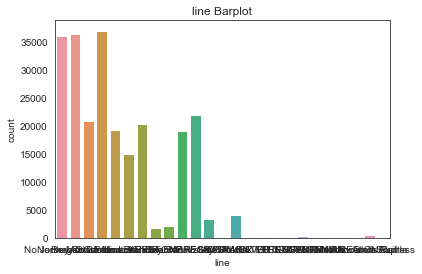

In [6]:
plt.title("line Barplot")
sns.countplot(x="line", data=df)

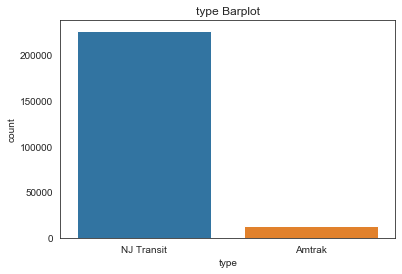

In [7]:
plt.title("type Barplot")
sns.countplot(x="type", data=df)

In [8]:
df = df.drop(['date','train_id','stop_sequence','from','to','scheduled_time','actual_time','line'], 1)

In [9]:
df['status'] = df['status'].map({'departed': 2, 'estimated status': 1, 'cancelled': 0})
df['type'] = df['type'].map({'NJ Transit': 1, 'Amtrak': 0})
df.head()

,from_id,to_id,delay_minutes,status,type
0,74,74,0.000000,2.0,1
1,74,40,1.150000,2.0,1
2,40,4,2.116667,2.0,1
3,4,8,1.200000,2.0,1
4,8,22,0.166667,2.0,1


In [10]:
columns = df[['from_id','to_id','delay_minutes','status','type']]

for column in columns: 
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [11]:
df.dtypes

from_id            int64
to_id              int64
delay_minutes    float64
status           float64
type               int64
dtype: object

## Missing value

In [12]:
df.isnull().sum()*100/df.isnull().count()

from_id           0.000000
to_id             0.000000
delay_minutes    10.695747
status            7.812546
type              0.000000
dtype: float64

In [13]:
df = df.dropna(axis=0,how='any') #drop all rows that have any NaN values

## Normalization: Preprocessing

In [26]:
X = df.drop(['status'],1)
Y = df.drop(['from_id','to_id','delay_minutes','type'],1)

In [27]:
X_normalized = normalize(X)
X_normalized_df = pd.DataFrame(normalize(X), columns = X.columns)

## K-Means

In [31]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10)
Y_pred = km.fit_predict(X_normalized_df)
Y_pred

array([2, 1, 2, ..., 0, 0, 0])

In [32]:
df["Cluster"]=Y_pred
df.head()

,from_id,to_id,delay_minutes,status,type,Cluster
0,74,74,0.0,2.0,1,2
140013,45,18,0.0,2.0,1,1
140014,18,12,0.0,2.0,1,2
140016,76,88,0.0,2.0,1,2
140018,143,48,0.0,2.0,1,1


In [33]:
df = df.sort_values(['Cluster'])
df

,from_id,to_id,delay_minutes,status,type,Cluster
90748,105,38187,3.066667,2.0,1,0
123639,125,32905,24.133333,2.0,1,0
53735,41,109,3.500000,2.0,1,0
150939,107,37953,7.116667,2.0,1,0
53736,109,37953,4.066667,2.0,1,0
...,...,...,...,...,...,...
40744,132,111,0.200000,2.0,1,2
40743,110,132,1.250000,2.0,1,2
40739,160,146,3.400000,2.0,1,2
40754,142,142,0.083333,2.0,1,2


In [38]:
df0 = df[(df.Cluster == 0)]
df1 = df[(df.Cluster == 1)]
df2 = df[(df.Cluster == 2)]

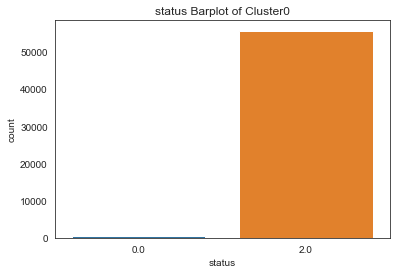

In [39]:
plt.title("status Barplot of Cluster0")
sns.countplot(x="status", data=df0)

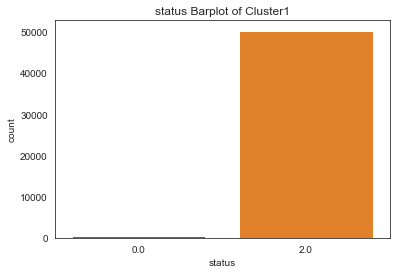

In [40]:
plt.title("status Barplot of Cluster1")
sns.countplot(x="status", data=df1)

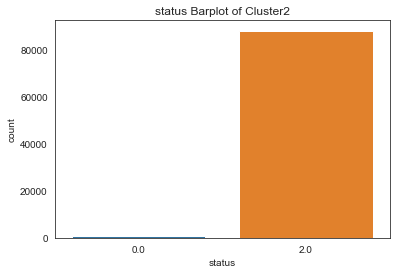

In [41]:
plt.title("status Barplot of Cluster2")
sns.countplot(x="status", data=df2)

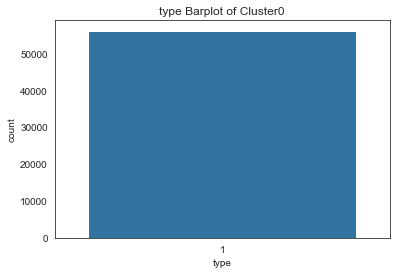

In [43]:
plt.title("type Barplot of Cluster0")
sns.countplot(x="type", data=df0)

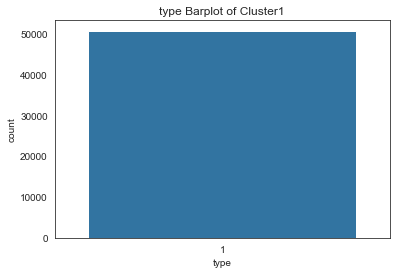

In [44]:
plt.title("type Barplot of Cluster1")
sns.countplot(x="type", data=df1)

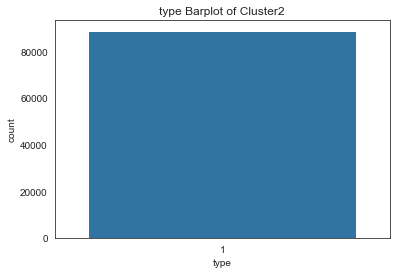

In [45]:
plt.title("type Barplot of Cluster2")
sns.countplot(x="type", data=df2)